In [63]:
import numpy as np

In [84]:
# Minami+20
def get_values_minami20(m):
    N=1
    tau1=1e-4 # s
    tau2=0.033/m # s
    G1=1.5e-4 # W/K
    C1=G1*tau1
    g2=3.3e-11*m # W/K
    G2=g2*N
    c2=1.1e-12 # J/K
    C2=c2*N
    r=G2/G1
    D=((G1+G2)/C1+G2/C2)**2.0-4.0*G1*G2/C1/C2
    lambda1=-0.5*((G1+G2)/C1+G2/C2+np.sqrt(D))
    lambda2=-0.5*((G1+G2)/C1+G2/C2-np.sqrt(D))
    L1=lambda1+(G1+G2)/C1
    L2=lambda2+(G1+G2)/C1
    #display(D,1./lambda1,1./lambda2,L1,L2)
    return lambda1, lambda2, L1, L2, C1, C2, G1, G2

In [78]:
# r の1次までの展開
def get_values_linear(m):
    N=1
    tau1=1e-4 # s
    tau2=0.033/m # s
    G1=1.5e-4 # W/K
    C1=G1*tau1
    g2=3.3e-11 # W/K
    G2=g2*N
    c2=1.1e-12 # J/K
    C2=c2*N
    r=G2/G1
    lambda1=-1.0/tau1*(1-tau2/(tau2-tau1)*r)
    lambda2=-1.0/tau2*(1-tau2/(tau2-tau1)*r)
    L1=lambda1+1.0/tau1*(1+r)
    L2=lambda2+1.0/tau1*(1+r)
    #display(D,1./lambda1,1./lambda2,L1,L2)
    # L1 の符号が変わる。
    return lambda1, lambda2, L1, L2, C1, C2, G1, G2

In [85]:
def T2_wafer_hit(t,m):
    lambda1, lambda2, L1, L2, C1, C2, G1, G2 = get_values_minami20(m)
    #lambda1, lambda2, L1, L2, C1, C2, G1, G2 =  get_values_linear(m)
    E_in = 1.0 * C1
    T2=L1*L2*E_in/G2*(np.exp(lambda1*t)-np.exp(lambda2*t))/(lambda2-lambda1)
    return T2
def T2_TES_hit(t,m):
    lambda1, lambda2, L1, L2, C1, C2, G1, G2 = get_values_minami20(m)
    #lambda1, lambda2, L1, L2, C1, C2, G1, G2 = get_values_linear(m)
    E_in = 1.0 * c2
    T2=E_in/C2*(-L1*np.exp(lambda1*t)+L2*np.exp(lambda2*t))/(lambda2-lambda1)
    return T2

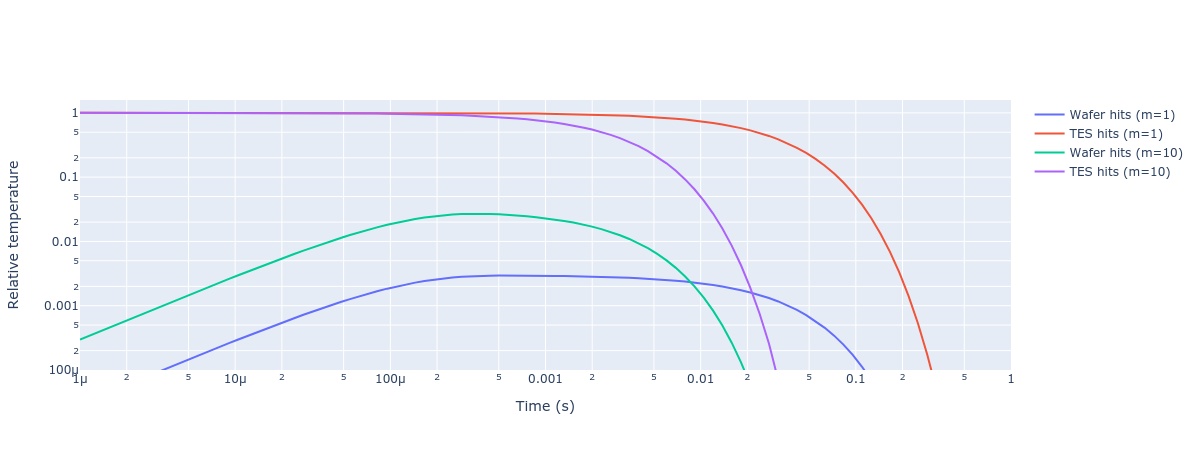

In [96]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected=False)
#import plotly.io as pio
#pio.renderers.default = "colab"
import plotly.express as px
colors=px.colors.qualitative.Plotly
palette=('black','red','blue','green','purple','orange',
         'magenta','cyan','yellow','brown','violet','turquoise')

ms=[1,10]
trace=[]
ts=np.logspace(-6,0,101)
for m in ms:
    T2_wafer_hits = [T2_wafer_hit(t,m) for t in ts]
    T2_TES_hits =[T2_TES_hit(t,m) for t in ts]
    trace.append(go.Scatter(x=ts, y=T2_wafer_hits, name="Wafer hits (m=%d)" % m))
    trace.append(go.Scatter(x=ts, y=T2_TES_hits, name="TES hits (m=%d)" % m))
layout = go.Layout(
    title="",
    xaxis={
        "title": "Time (s)",
        "type" : "log",
    },
    yaxis={
        "title": "Relative temperature",
        "type" : "log",
        "range": [-4,0.2]
    }    
)

fig = go.Figure(data=trace, layout=layout)
offline.iplot(fig)